# Eve (altura)

se comparan como la altura afecta a los diferentes caracteres

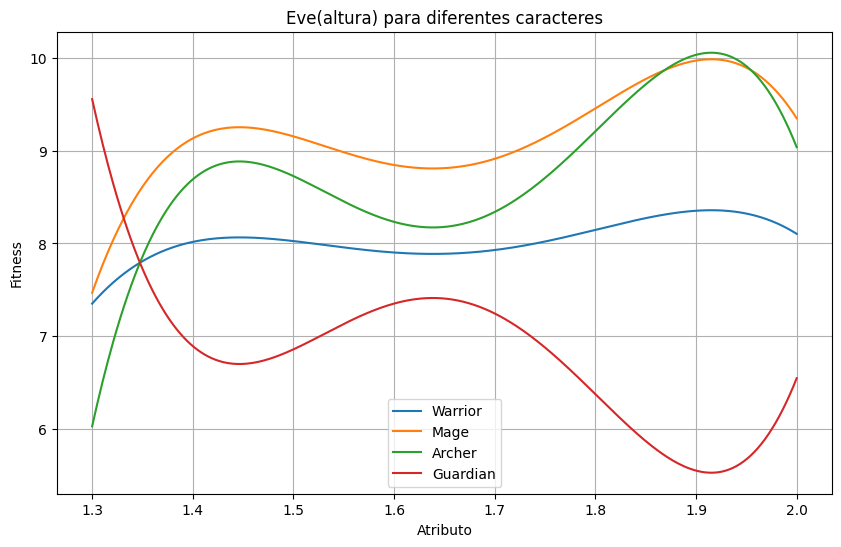

In [119]:
import numpy as np
import matplotlib.pyplot as plt
TOTAL_POINTS = 150
# Define the eve function
def eve(strength, dexterity, intelligence, vigor, constitution, height):
    total_strength = 100 * np.tanh(0.01 * strength)
    total_dexterity = np.tanh(0.01 * dexterity)
    total_intelligence = 0.6 * np.tanh(0.01 * intelligence)
    total_vigor = np.tanh(0.01 * vigor)
    total_constitution = 100 * np.tanh(0.01 * constitution)

    atm = 0.5 - (3*height - 5)**4 + (3*height - 5)**2 + height/2
    dem = 2 + (3*height - 5)**4 - (3*height - 5)**2 - height/2

    attack = (total_dexterity + total_intelligence) * total_strength * atm
    defense = (total_vigor + total_intelligence) * total_constitution * dem
    
    return 0.6 * attack + 0.4 * defense


def eve_original(warrior, strength, dexterity, intelligence, vigor, constitution, height):
    total_strength = 100 * np.tanh(0.01 * strength)
    total_dexterity = np.tanh(0.01 * dexterity)
    total_intelligence = 0.6 * np.tanh(0.01 * intelligence)
    total_vigor = np.tanh(0.01 * vigor)
    total_constitution = 100 * np.tanh(0.01 * constitution)

    atm = 0.5 - (3*height - 5)**4 + (3*height - 5)**2 + height/2
    dem = 2 + (3*height - 5)**4 - (3*height - 5)**2 - height/2

    attack = (total_dexterity + total_intelligence) * total_strength * atm
    defense = (total_vigor + total_intelligence) * total_constitution * dem
    performances = {
        'warrior': 0.6 * attack + 0.4 * defense,
        'archer': 0.9 * attack + 0.1 * defense,
        'guardian': 0.1 * attack + 0.9 * defense,
        'mage': 0.8 * attack + 0.3 * defense
    }
    return performances[warrior]

# Constants
strength = 20
dexterity = 20
intelligence = 20
vigor = 20
constitution = 20
height= 1.5

# Range for height
heights = np.linspace(1.3, 2, 400)
strengths = np.linspace(0, 100, 400)
dexteritys = np.linspace(0, 100, 400)
intelligences = np.linspace(0, 100, 400)
constitutions = np.linspace(0, 100, 400)
vigors = np.linspace(0, 100, 400)

# Calculate outputs for the range of heights
s_outputs = np.array([eve(s, dexterity, intelligence, vigor, constitution, height) for s in strengths])
d_outputs = np.array([eve(strength, d, intelligence, vigor, constitution, height) for d in dexteritys])
i_outputs = np.array([eve(strength, dexterity, i, vigor, constitution, height) for i in intelligences])
c_outputs = np.array([eve(strength, dexterity, intelligence, vigor, c, height) for c in constitutions])
v_outputs = np.array([eve(strength, dexterity, intelligence, v, constitution, height) for v in vigors])
outputs = np.array([eve_original("warrior", strength, dexterity, intelligence, vigor, constitution, h) for h in heights])
outputs_mage = np.array([eve_original("mage", strength, dexterity, intelligence, vigor, constitution, h) for h in heights])
outputs_archer = np.array([eve_original("archer", strength, dexterity, intelligence, vigor, constitution, h) for h in heights])
outputs_guardian = np.array([eve_original("guardian", strength, dexterity, intelligence, vigor, constitution, h) for h in heights])


# plot the outputs
plt.figure(figsize=(10, 6))
plt.grid()
# plt.plot(strengths, s_outputs, label='Strength')
# plt.plot(dexteritys, d_outputs, label='Dexterity')
# plt.plot(intelligences, i_outputs, label='Intelligence')
# plt.plot(constitutions, c_outputs, label='Constitution')
# plt.plot(vigors, v_outputs, label='Vigor')
plt.plot(heights, outputs, label='Warrior')
plt.plot(heights, outputs_mage, label='Mage')
plt.plot(heights, outputs_archer, label='Archer')
plt.plot(heights, outputs_guardian, label='Guardian')
plt.xlabel('Atributo')
plt.ylabel('Fitness')
plt.title('Eve(altura) para diferentes caracteres')
plt.legend()
plt.show()

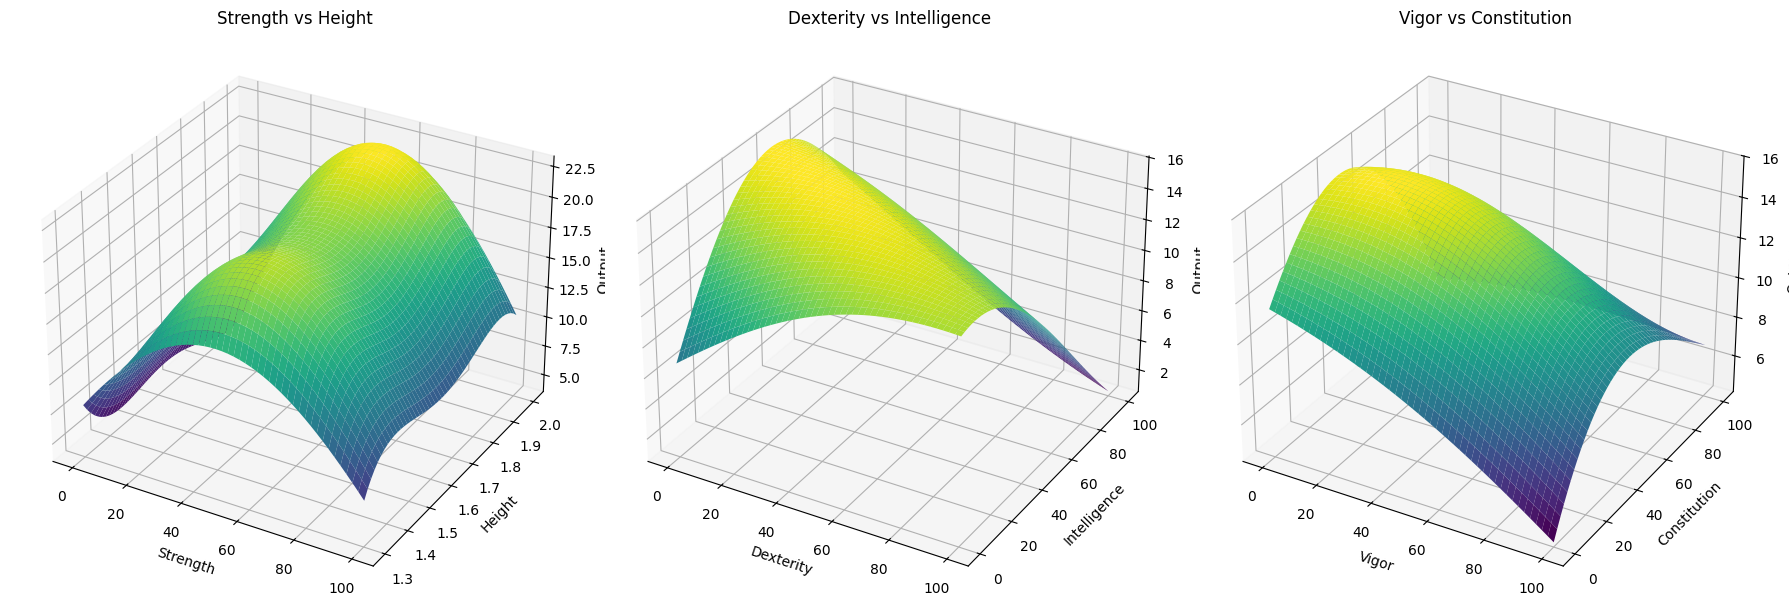

In [62]:
# Create a meshgrid for two variables to create terrain plots
strengths, heights = np.meshgrid(np.linspace(0, 100, 50), np.linspace(1.3, 2, 50))
dexteritys, intelligences = np.meshgrid(np.linspace(0, 100, 50), np.linspace(0, 100, 50))
vigors, constitutions = np.meshgrid(np.linspace(0, 100, 50), np.linspace(0, 100, 50))

# Compute the outputs for each meshgrid adjusting parameters to maintain their sum at 150
s_h_outputs = np.array([[eve(s, 20, (150 - s - 20 - 20 - 20), 20, 20, h) for s, h in zip(strength_row, height_row)]
                        for strength_row, height_row in zip(strengths, heights)])

d_i_outputs = np.array([[eve(20, d, i, 20, (150 - d - i - 20 - 20), 1.5) for d, i in zip(dexterity_row, intelligence_row)]
                        for dexterity_row, intelligence_row in zip(dexteritys, intelligences)])

v_c_outputs = np.array([[eve(20, 20, (150 - v - c - 20 - 20), v, c, 1.5) for v, c in zip(vigor_row, constitution_row)]
                        for vigor_row, constitution_row in zip(vigors, constitutions)])

# Plotting the 3D surfaces
fig = plt.figure(figsize=(18, 6))

# Strength vs Height
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(strengths, heights, s_h_outputs, cmap='viridis')
ax1.set_title('Strength vs Height')
ax1.set_xlabel('Strength')
ax1.set_ylabel('Height')
ax1.set_zlabel('Fitness')

# Dexterity vs Intelligence
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(dexteritys, intelligences, d_i_outputs, cmap='viridis')
ax2.set_title('Dexterity vs Intelligence')
ax2.set_xlabel('Dexterity')
ax2.set_ylabel('Intelligence')
ax2.set_zlabel('Fitness')

# Vigor vs Constitution
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(vigors, constitutions, v_c_outputs, cmap='viridis')
ax3.set_title('Vigor vs Constitution')
ax3.set_xlabel('Vigor')
ax3.set_ylabel('Constitution')
ax3.set_zlabel('Fitness')

plt.tight_layout()
plt.show()





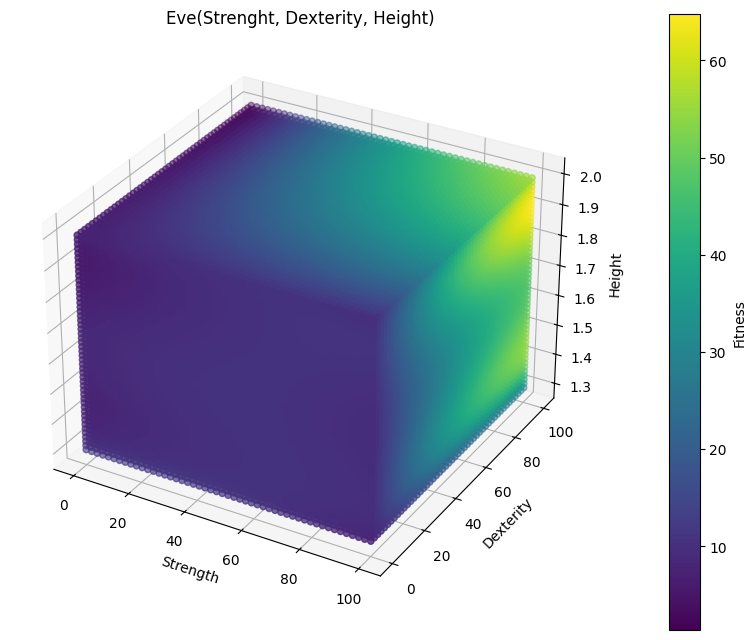

In [40]:

# Redefine the meshgrid for Strength, Dexterity, and Height with finer granularity for better visualization
strengths, dexteritys, heights = np.meshgrid(
    np.linspace(0, 100, 50),  # Strength
    np.linspace(0, 100, 50),  # Dexterity
    np.linspace(1.3, 2, 50)   # Height
)

# Flatten the grids for plotting
strengths_flat = strengths.flatten()
dexteritys_flat = dexteritys.flatten()
heights_flat = heights.flatten()

# Fixed values for Intelligence and Constitution
fixed_intelligence = 20
fixed_constitution = 20

# Adjust the Vigor to maintain the sum of parameters (excluding Height) to 150
outputs_adjusted = np.array([
    eve(s, d, fixed_intelligence, 150 - s - d - fixed_intelligence - fixed_constitution, fixed_constitution, h) 
    for s, d, h in zip(strengths_flat, dexteritys_flat, heights_flat)
])

# Plotting the 3D scatter plot with fitness as color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing the fitness (output of eve function)
scat = ax.scatter(strengths_flat, dexteritys_flat, heights_flat, c=outputs_adjusted, cmap='viridis')
cbar = fig.colorbar(scat, ax=ax, pad=0.1)
cbar.set_label('Fitness')

ax.set_xlabel('Strength')
ax.set_ylabel('Dexterity')
ax.set_zlabel('Height')
ax.set_title('Eve(Strenght, Dexterity, Height)')
plt.savefig('../output/h_s.png', transparent=True)
plt.show()



# Dominio del crossover vs mutation

comparando el posible dominio del crossover vs mutation

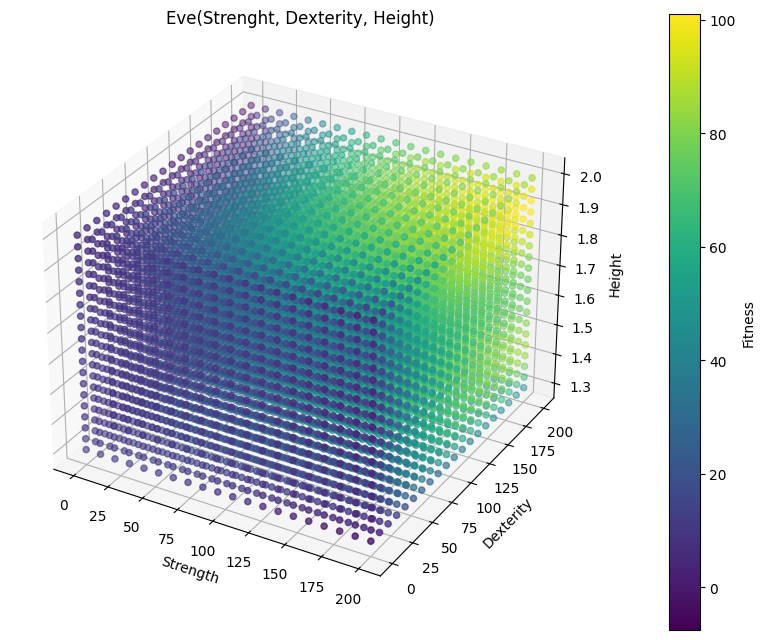

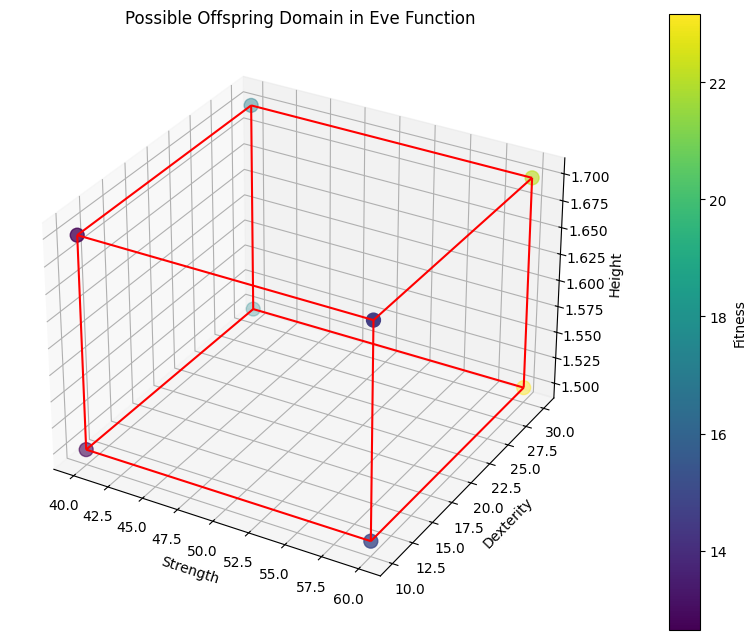

In [104]:
# Redefine the meshgrid for Strength, Dexterity, and Height with finer granularity for better visualization
strengths, dexteritys, heights = np.meshgrid(
    np.linspace(0, 200, 20),  # Strength
    np.linspace(0, 200, 20),  # Dexterity
    np.linspace(1.3, 2, 20)   # Height
)


# Flatten the grids for plotting
strengths_flat = strengths.flatten()
dexteritys_flat = dexteritys.flatten()
heights_flat = heights.flatten()

# Fixed values for Intelligence and Constitution
fixed_intelligence = 20
fixed_constitution = 20

# Adjust the Vigor to maintain the sum of parameters (excluding Height) to 150
outputs_adjusted = np.array([
    eve(s, d, fixed_intelligence, 150 - s - d - fixed_intelligence - fixed_constitution, fixed_constitution, h) 
    for s, d, h in zip(strengths_flat, dexteritys_flat, heights_flat)
])

# Plotting the 3D scatter plot with fitness as color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing the fitness (output of eve function)
scat = ax.scatter(strengths_flat, dexteritys_flat, heights_flat, c=outputs_adjusted, cmap='viridis')
cbar = fig.colorbar(scat, ax=ax, pad=0.1)
cbar.set_label('Fitness')

ax.set_xlabel('Strength')
ax.set_ylabel('Dexterity')
ax.set_zlabel('Height')
ax.set_title('Eve(Strenght, Dexterity, Height)')
plt.savefig('../output/h_s.png', transparent=True)
plt.show()


import numpy as np
import matplotlib.pyplot as plt


# Fixed intelligence and constitution values
fixed_intelligence_A = 20
fixed_constitution_A = 20

fixed_intelligence_B = 30
fixed_constitution_B = 10

# Possible values
strengths = [40, 60]
dexteritys = [30, 10]
heights = [1.5, 1.7]

# Generate all combinations
from itertools import product

combinations = list(product(strengths, dexteritys, heights))

# Store results
results = []

for s, d, h in combinations:
    # Choose intelligence and constitution from parents arbitrarily
    # For simplicity, let's alternate between parents
    if s == 40:
        intelligence = fixed_intelligence_A
        constitution = fixed_constitution_A
    else:
        intelligence = fixed_intelligence_B
        constitution = fixed_constitution_B
    
    # Calculate vigor to sum up to 150
    vigor = 150 - s - d - intelligence - constitution
    
    # Evaluate the 'eve' function
    fitness = eve(s, d, intelligence, vigor, constitution, h)
    
    results.append({
        'Strength': s,
        'Dexterity': d,
        'Height': h,
        'Intelligence': intelligence,
        'Constitution': constitution,
        'Vigor': vigor,
        'Fitness': fitness
    })

    # Extract data for plotting
strengths_plot = [r['Strength'] for r in results]
dexteritys_plot = [r['Dexterity'] for r in results]
heights_plot = [r['Height'] for r in results]
fitness_plot = [r['Fitness'] for r in results]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the offspring
scat = ax.scatter(strengths_plot, dexteritys_plot, heights_plot, c=fitness_plot, cmap='viridis', s=100)
cbar = fig.colorbar(scat, ax=ax, pad=0.1)
cbar.set_label('Fitness')

# Draw the box representing the domain
# Get the min and max values
x_limits = [min(strengths_plot), max(strengths_plot)]
y_limits = [min(dexteritys_plot), max(dexteritys_plot)]
z_limits = [min(heights_plot), max(heights_plot)]

# Generate the edges of the box
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Define the vertices of the box
import itertools
vertices = list(itertools.product(x_limits, y_limits, z_limits))

# Define the edges connecting the vertices
edges = [
    [vertices[0], vertices[1]], [vertices[0], vertices[2]], [vertices[0], vertices[4]],
    [vertices[7], vertices[6]], [vertices[7], vertices[5]], [vertices[7], vertices[3]],
    [vertices[1], vertices[3]], [vertices[1], vertices[5]],
    [vertices[2], vertices[3]], [vertices[2], vertices[6]],
    [vertices[4], vertices[5]], [vertices[4], vertices[6]],
]

# Create a collection of lines
edge_collection = Line3DCollection(edges, colors='red', linewidths=1.5)
ax.add_collection3d(edge_collection)

ax.set_xlabel('Strength')
ax.set_ylabel('Dexterity')
ax.set_zlabel('Height')
ax.set_title('Possible Offspring Domain in Eve Function')

plt.show()



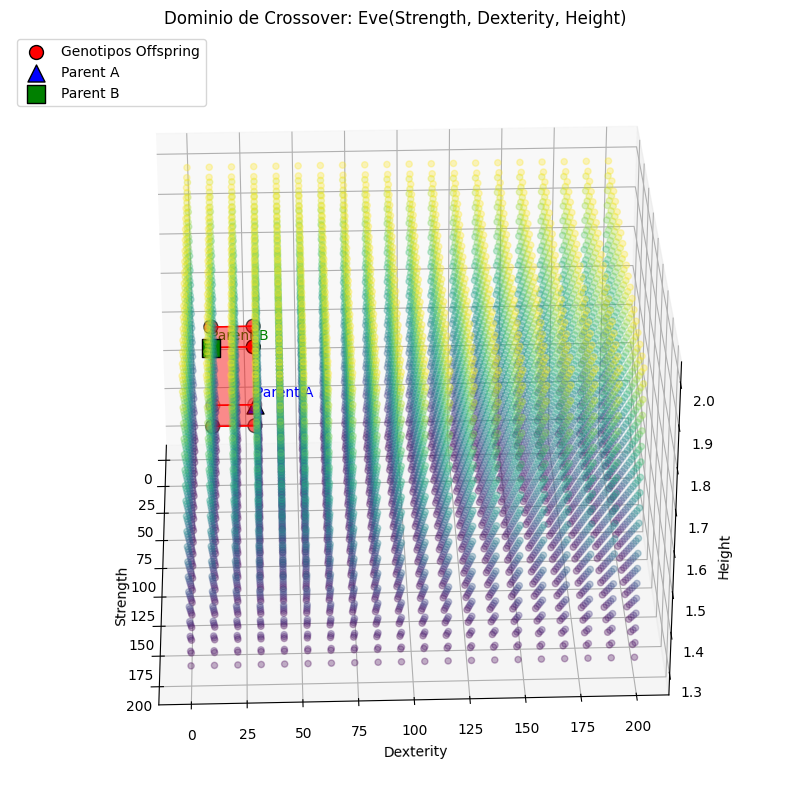

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Step 1: Generate the Fitness Landscape
strengths, dexteritys, heights = np.meshgrid(
    np.linspace(0, 200, 20),  # Strength
    np.linspace(0, 200, 20),  # Dexterity
    np.linspace(1.3, 2, 20)   # Height
)

# Flatten the grids for plotting
strengths_flat = strengths.flatten()
dexteritys_flat = dexteritys.flatten()
heights_flat = heights.flatten()

# Fixed values for Intelligence and Constitution
fixed_intelligence = 20
fixed_constitution = 20

# Adjust the Vigor to maintain the sum of parameters (excluding Height) to 150
outputs_adjusted = np.array([
    eve(s, d, fixed_intelligence, 150 - s - d - fixed_intelligence - fixed_constitution, fixed_constitution, h) 
    for s, d, h in zip(strengths_flat, dexteritys_flat, heights_flat)
])

# Step 2: Define Parent Genotypes and Generate Offspring
# Parent A attributes
parentA = {
    'Strength': 40,
    'Dexterity': 30,
    'Intelligence': 20,
    'Constitution': 20,
    'Height': 1.5
}
parentA['Vigor'] = 150 - parentA['Strength'] - parentA['Dexterity'] - parentA['Intelligence'] - parentA['Constitution']
parentA['Fitness'] = eve(parentA['Strength'], parentA['Dexterity'], parentA['Intelligence'], parentA['Vigor'], parentA['Constitution'], parentA['Height'])

# Parent B attributes
parentB = {
    'Strength': 60,
    'Dexterity': 10,
    'Intelligence': 30,
    'Constitution': 10,
    'Height': 1.7
}
parentB['Vigor'] = 150 - parentB['Strength'] - parentB['Dexterity'] - parentB['Intelligence'] - parentB['Constitution']
parentB['Fitness'] = eve(parentB['Strength'], parentB['Dexterity'], parentB['Intelligence'], parentB['Vigor'], parentB['Constitution'], parentB['Height'])

# Possible values from parents
strengths_parents = [parentA['Strength'], parentB['Strength']]
dexteritys_parents = [parentA['Dexterity'], parentB['Dexterity']]
heights_parents = [parentA['Height'], parentB['Height']]

# Generate all offspring combinations via crossover
from itertools import product

offspring_combinations = list(product(strengths_parents, dexteritys_parents, heights_parents))

# Store offspring data
offspring_data = []

for s, d, h in offspring_combinations:
    # Choose intelligence and constitution based on which parent's strength is used
    if s == parentA['Strength']:
        intelligence = parentA['Intelligence']
        constitution = parentA['Constitution']
    else:
        intelligence = parentB['Intelligence']
        constitution = parentB['Constitution']
    
    # Calculate vigor to sum up to 150
    vigor = 150 - s - d - intelligence - constitution
    
    # Evaluate the 'eve' function
    fitness = eve(s, d, intelligence, vigor, constitution, h)
    
    offspring_data.append({
        'Strength': s,
        'Dexterity': d,
        'Height': h,
        'Intelligence': intelligence,
        'Constitution': constitution,
        'Vigor': vigor,
        'Fitness': fitness
    })

# Extract offspring data for plotting
offspring_strengths = [data['Strength'] for data in offspring_data]
offspring_dexteritys = [data['Dexterity'] for data in offspring_data]
offspring_heights = [data['Height'] for data in offspring_data]
offspring_fitness = [data['Fitness'] for data in offspring_data]

# Step 3: Create the Animation
# Create figure and axis
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Function to initialize the plot
def init():
    # Plot the fitness landscape
    scat = ax.scatter(strengths_flat, dexteritys_flat, heights_flat, c=outputs_adjusted, cmap='viridis', alpha=0.3)

    # Plot offspring genotypes
    ax.scatter(offspring_strengths, offspring_dexteritys, offspring_heights, 
               c='red', s=100, label='Genotipos Offspring', edgecolors='k')

    # Plot parent genotypes
    ax.scatter(parentA['Strength'], parentA['Dexterity'], parentA['Height'],
               c='blue', s=150, marker='^', label='Parent A', edgecolors='k')
    ax.scatter(parentB['Strength'], parentB['Dexterity'], parentB['Height'],
               c='green', s=150, marker='s', label='Parent B', edgecolors='k')

    # Annotate parents
    ax.text(parentA['Strength'], parentA['Dexterity'], parentA['Height']+0.02, 'Parent A', color='blue')
    ax.text(parentB['Strength'], parentB['Dexterity'], parentB['Height']+0.02, 'Parent B', color='green')

    # Draw the domain box
    x_limits = [min(strengths_parents), max(strengths_parents)]
    y_limits = [min(dexteritys_parents), max(dexteritys_parents)]
    z_limits = [min(heights_parents), max(heights_parents)]

    corners = np.array([[x_limits[0], y_limits[0], z_limits[0]],
                        [x_limits[1], y_limits[0], z_limits[0]],
                        [x_limits[1], y_limits[1], z_limits[0]],
                        [x_limits[0], y_limits[1], z_limits[0]],
                        [x_limits[0], y_limits[0], z_limits[1]],
                        [x_limits[1], y_limits[0], z_limits[1]],
                        [x_limits[1], y_limits[1], z_limits[1]],
                        [x_limits[0], y_limits[1], z_limits[1]]])

    faces = [[corners[j] for j in [0,1,2,3]],
             [corners[j] for j in [4,5,6,7]], 
             [corners[j] for j in [0,1,5,4]], 
             [corners[j] for j in [2,3,7,6]],
             [corners[j] for j in [1,2,6,5]],
             [corners[j] for j in [4,7,3,0]]]

    box = Poly3DCollection(faces, linewidths=1, edgecolors='r', alpha=.25)
    box.set_facecolor((1, 0, 0, 0.1))
    ax.add_collection3d(box)

    # Set labels and title
    ax.set_xlabel('Strength')
    ax.set_ylabel('Dexterity')
    ax.set_zlabel('Height')
    ax.set_title('Dominio de Crossover: Eve(Strength, Dexterity, Height)')

    # Update legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper left')

    return fig,

# Function to update the plot for each frame
def update(angle):
    ax.view_init(elev=30, azim=angle)
    return fig,

# Create animation
ani = FuncAnimation(fig, update, frames=range(0, 360, 2), init_func=init, blit=False)

# Save the animation as a GIF
ani.save('../output/offspring_domain_crossover.gif', writer='pillow', fps=20)

# To display the animation in a Jupyter notebook, you can use:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# Show the plot (optional)
plt.show()



Genera una animación donde se ven los dos dominios (mutación con gauss)

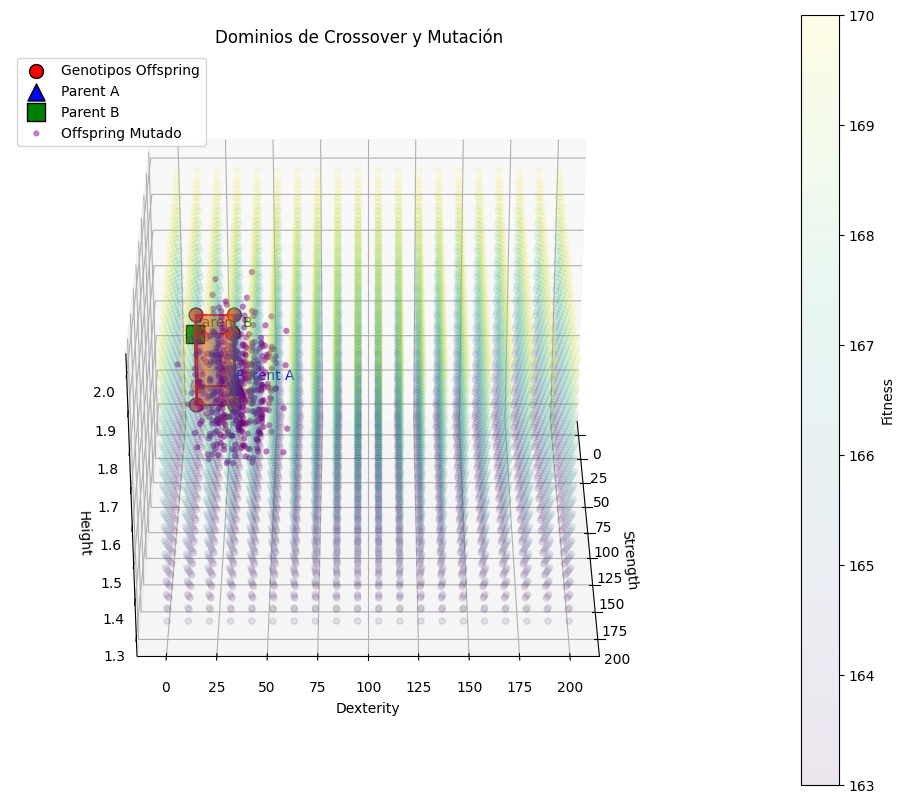

In [117]:

# Step 1: Recreate the Previous 3D Graph
strengths, dexteritys, heights = np.meshgrid(
    np.linspace(0, 200, 20),  # Strength
    np.linspace(0, 200, 20),  # Dexterity
    np.linspace(1.3, 2, 20)   # Height
)

# Flatten the grids for plotting
strengths_flat = strengths.flatten()
dexteritys_flat = dexteritys.flatten()
heights_flat = heights.flatten()

# Fixed values for Intelligence and Constitution
fixed_intelligence = 20
fixed_constitution = 20

# Adjust the Vigor to maintain the sum of parameters (excluding Height) to 150
outputs_adjusted = np.array([
    eve(s, d, fixed_intelligence, 150 - s - d - fixed_intelligence - fixed_constitution, fixed_constitution, h) 
    for s, d, h in zip(strengths_flat, dexteritys_flat, heights_flat)
])

# Plotting the 3D scatter plot with fitness as color
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing the fitness (output of eve function)
scat = ax.scatter(strengths_flat, dexteritys_flat, heights_flat, c=outputs_adjusted, cmap='viridis', alpha=0.1)
cbar = fig.colorbar(scat, ax=ax, pad=0.1)
cbar.set_label('Fitness')

ax.set_xlabel('Strength')
ax.set_ylabel('Dexterity')
ax.set_zlabel('Height')
ax.set_title('Dominios de Crossover y Mutación')

# Step 2: Define Two Example Genotypes and Generate Offspring
# Parent A attributes
parentA = {
    'Strength': 40,
    'Dexterity': 30,
    'Intelligence': 20,
    'Constitution': 20,
    'Height': 1.5
}
parentA['Vigor'] = 150 - parentA['Strength'] - parentA['Dexterity'] - parentA['Intelligence'] - parentA['Constitution']
parentA['Fitness'] = eve(parentA['Strength'], parentA['Dexterity'], parentA['Intelligence'], parentA['Vigor'], parentA['Constitution'], parentA['Height'])

# Parent B attributes
parentB = {
    'Strength': 60,
    'Dexterity': 10,
    'Intelligence': 30,
    'Constitution': 10,
    'Height': 1.7
}
parentB['Vigor'] = 150 - parentB['Strength'] - parentB['Dexterity'] - parentB['Intelligence'] - parentB['Constitution']
parentB['Fitness'] = eve(parentB['Strength'], parentB['Dexterity'], parentB['Intelligence'], parentB['Vigor'], parentB['Constitution'], parentB['Height'])

# Possible values from parents
strengths_parents = [parentA['Strength'], parentB['Strength']]
dexteritys_parents = [parentA['Dexterity'], parentB['Dexterity']]
heights_parents = [parentA['Height'], parentB['Height']]

# Generate all combinations
from itertools import product

offspring_combinations = list(product(strengths_parents, dexteritys_parents, heights_parents))

# Store offspring data
offspring_data = []

for s, d, h in offspring_combinations:
    # Choose intelligence and constitution based on which parent's strength is used
    if s == parentA['Strength']:
        intelligence = parentA['Intelligence']
        constitution = parentA['Constitution']
    else:
        intelligence = parentB['Intelligence']
        constitution = parentB['Constitution']
    
    # Calculate vigor to sum up to 150
    vigor = 150 - s - d - intelligence - constitution
    
    # Evaluate the 'eve' function
    fitness = eve(s, d, intelligence, vigor, constitution, h)
    
    offspring_data.append({
        'Strength': s,
        'Dexterity': d,
        'Height': h,
        'Intelligence': intelligence,
        'Constitution': constitution,
        'Vigor': vigor,
        'Fitness': fitness
    })

# Extract offspring data for plotting
offspring_strengths = [data['Strength'] for data in offspring_data]
offspring_dexteritys = [data['Dexterity'] for data in offspring_data]
offspring_heights = [data['Height'] for data in offspring_data]

# Plot offspring genotypes
ax.scatter(offspring_strengths, offspring_dexteritys, offspring_heights, 
           c='red', s=100, label='Genotipos Offspring', edgecolors='k')

# Plot parent genotypes
ax.scatter(parentA['Strength'], parentA['Dexterity'], parentA['Height'],
           c='blue', s=150, marker='^', label='Parent A', edgecolors='k')
ax.scatter(parentB['Strength'], parentB['Dexterity'], parentB['Height'],
           c='green', s=150, marker='s', label='Parent B', edgecolors='k')

# Annotate parents
ax.text(parentA['Strength'], parentA['Dexterity'], parentA['Height']+0.02, 'Parent A', color='blue')
ax.text(parentB['Strength'], parentB['Dexterity'], parentB['Height']+0.02, 'Parent B', color='green')

# Draw the domain box representing possible changes due to crossover
# Get the min and max values from the parents
x_limits = [min(strengths_parents), max(strengths_parents)]
y_limits = [min(dexteritys_parents), max(dexteritys_parents)]
z_limits = [min(heights_parents), max(heights_parents)]

# Create the corner points of the box
corners = np.array([[x_limits[0], y_limits[0], z_limits[0]],
                    [x_limits[1], y_limits[0], z_limits[0]],
                    [x_limits[1], y_limits[1], z_limits[0]],
                    [x_limits[0], y_limits[1], z_limits[0]],
                    [x_limits[0], y_limits[0], z_limits[1]],
                    [x_limits[1], y_limits[0], z_limits[1]],
                    [x_limits[1], y_limits[1], z_limits[1]],
                    [x_limits[0], y_limits[1], z_limits[1]]])

# Define the vertices that make up each face of the box
faces = [[corners[j] for j in [0,1,2,3]],
         [corners[j] for j in [4,5,6,7]], 
         [corners[j] for j in [0,1,5,4]], 
         [corners[j] for j in [2,3,7,6]],
         [corners[j] for j in [1,2,6,5]],
         [corners[j] for j in [4,7,3,0]]]

# Create a 3D polygon collection
box = Poly3DCollection(faces, linewidths=1, edgecolors='r', alpha=.25)
box.set_facecolor((1, 0, 0, 0.1))  # Set box face color to red with transparency

# Add the box to the plot
ax.add_collection3d(box)

# Step 4: Generate Mutated Genotypes for a Selected Offspring
# Number of mutated genotypes to generate
num_mutations = 500

# Selected offspring genotype (using the first in offspring_data)
selected_offspring = offspring_data[0]  # You can choose any offspring

# Mutation standard deviations
sigma_strength = 10
sigma_dexterity = 10
sigma_height = 0.1

# Generate mutated gene values
mutated_strengths = np.random.normal(loc=selected_offspring['Strength'], scale=sigma_strength, size=num_mutations)
mutated_dexteritys = np.random.normal(loc=selected_offspring['Dexterity'], scale=sigma_dexterity, size=num_mutations)
mutated_heights = np.random.normal(loc=selected_offspring['Height'], scale=sigma_height, size=num_mutations)

# Ensure gene values are within valid ranges
mutated_strengths = np.clip(mutated_strengths, 0, 200)
mutated_dexteritys = np.clip(mutated_dexteritys, 0, 200)
mutated_heights = np.clip(mutated_heights, 1.3, 2.0)

# Calculate Vigor for each mutated genotype to maintain sum of stats equals 150
mutated_vigors = 150 - mutated_strengths - mutated_dexteritys - selected_offspring['Intelligence'] - selected_offspring['Constitution']

# Filter out invalid mutations where Vigor is negative or exceeds limits
valid_indices = (mutated_vigors >= 0) & (mutated_vigors <= 200)
mutated_strengths = mutated_strengths[valid_indices]
mutated_dexteritys = mutated_dexteritys[valid_indices]
mutated_heights = mutated_heights[valid_indices]

# Plot Mutated Genotypes
ax.scatter(mutated_strengths, mutated_dexteritys, mutated_heights,
           c='purple', s=20, alpha=0.5, label='Offspring Mutado', edgecolors='none')

# Update legend to avoid duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

# Step 6: Create Animation to Rotate the Graph 360 Degrees
def update(num):
    ax.view_init(azim=num)
    return fig,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=False)

# Save the animation as a GIF using PillowWriter
ani.save('../output/video/offspring_domain_comparison.gif', writer="pillow", fps=20)

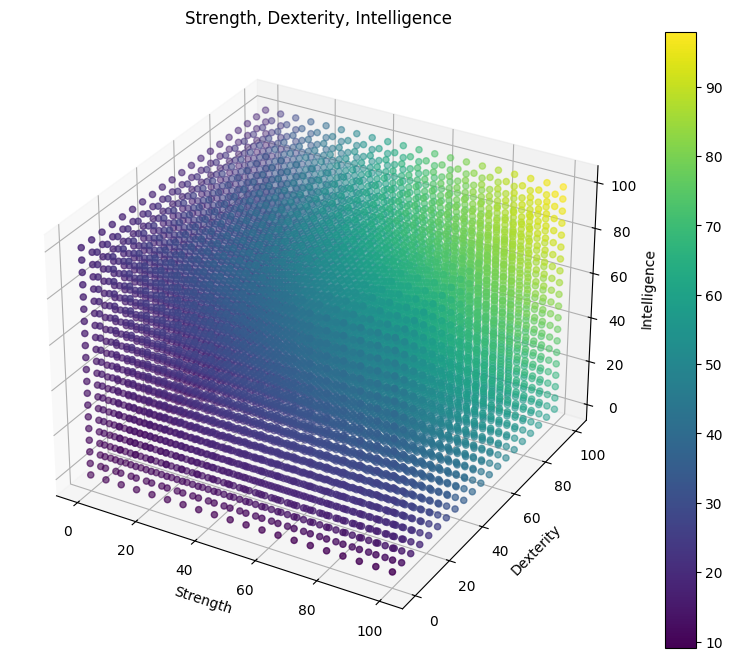

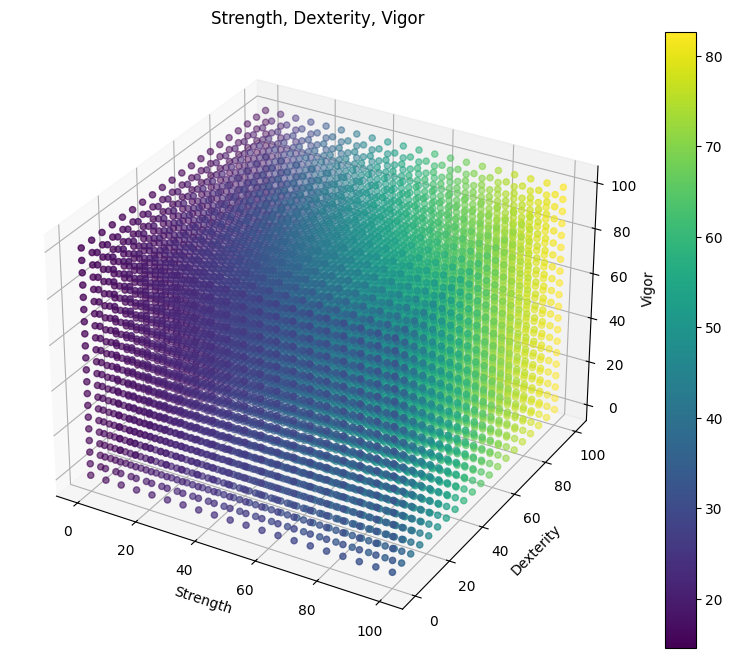

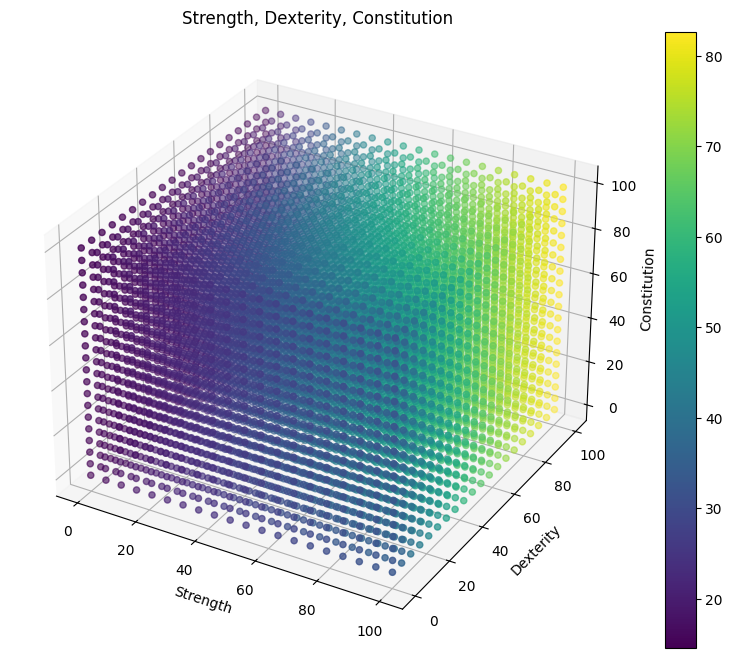

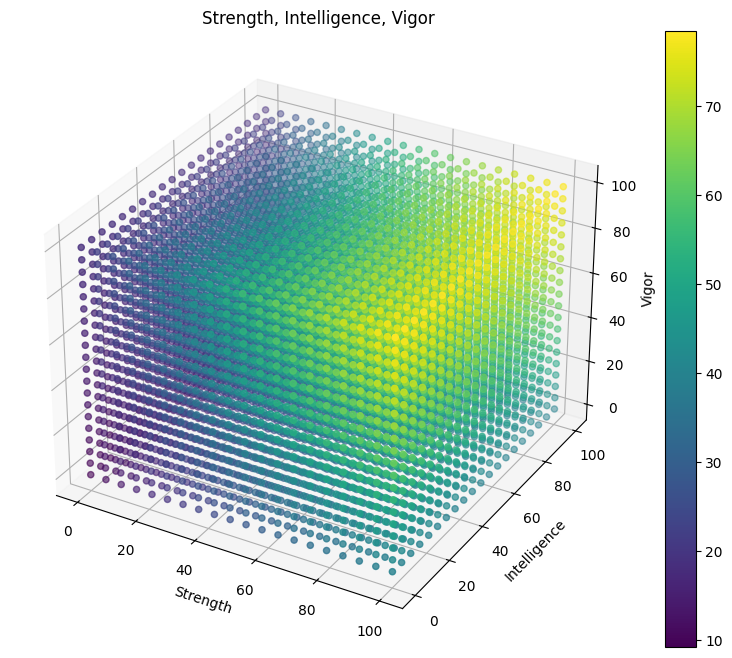

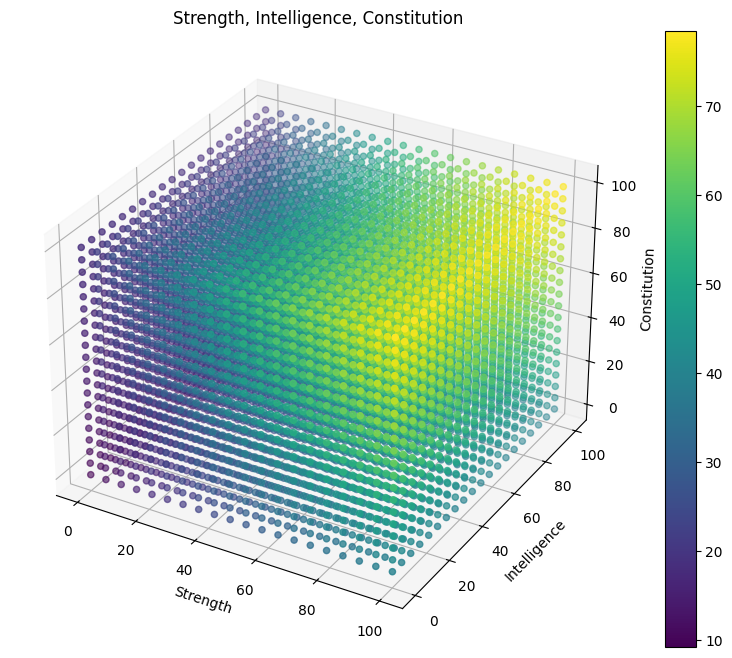

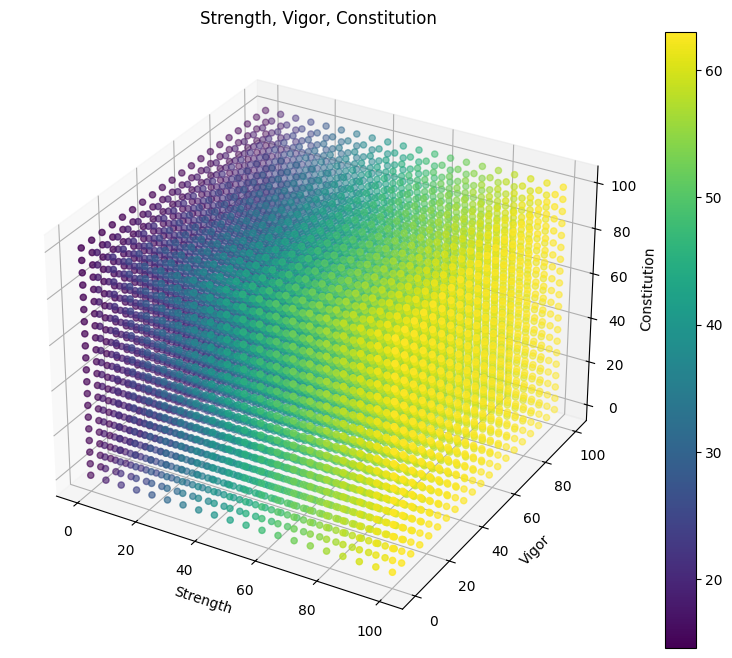

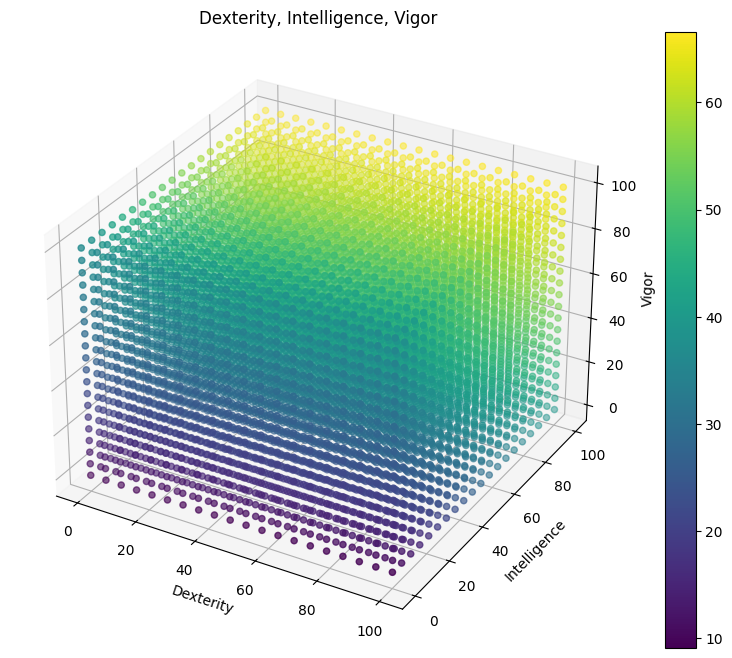

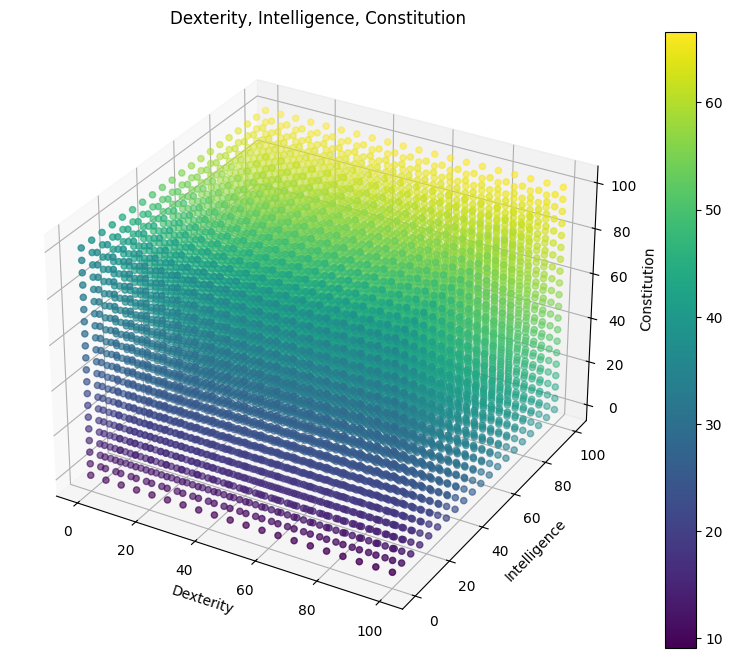

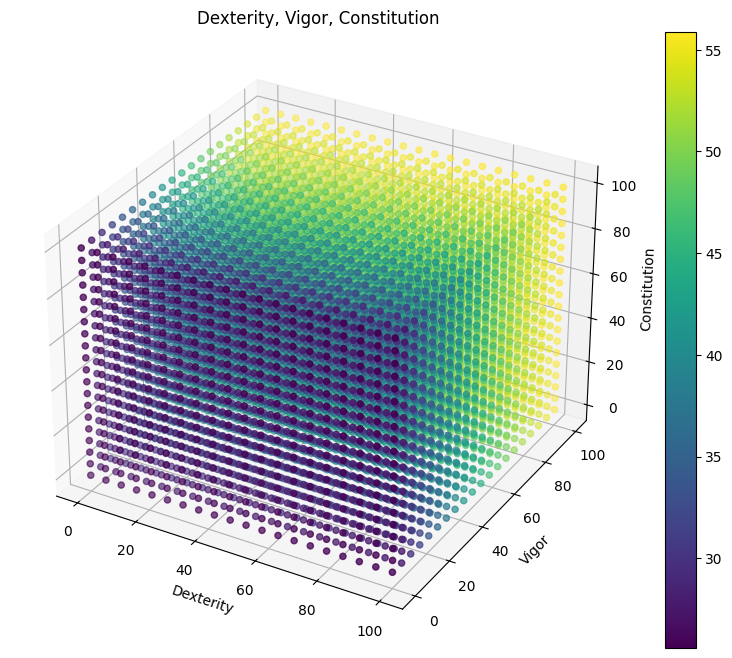

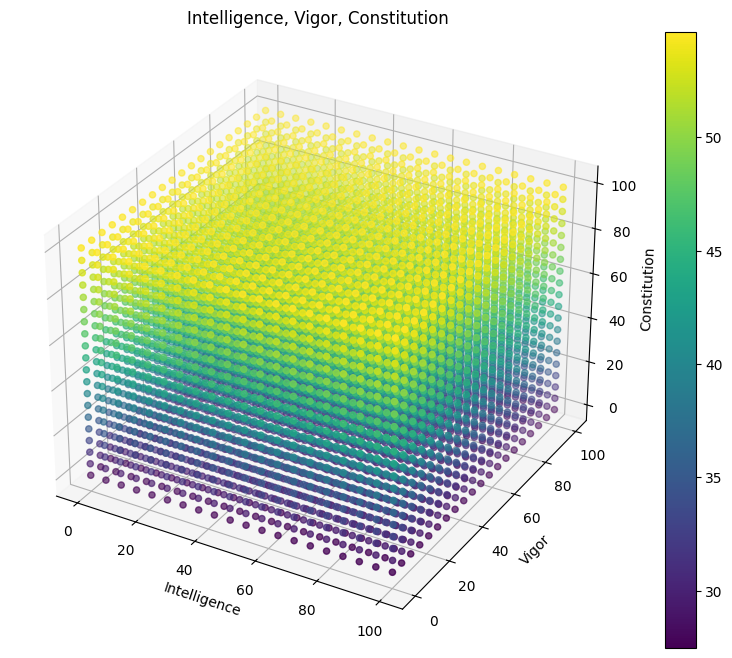

In [4]:


def plot_3d_combinations(x_var, y_var, z_var):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define ranges for the variables
    x_range = np.linspace(0, 100, 20) if x_var != 'Height' else np.linspace(1.3, 2, 20)
    y_range = np.linspace(0, 100, 20) if y_var != 'Height' else np.linspace(1.3, 2, 20)
    z_range = np.linspace(0, 100, 20) if z_var != 'Height' else np.linspace(1.3, 2, 20)

    # Create a meshgrid for the variables
    x_values, y_values, z_values = np.meshgrid(x_range, y_range, z_range)

    # Flatten the arrays for plotting
    x_flat = x_values.flatten()
    y_flat = y_values.flatten()
    z_flat = z_values.flatten()

    # Generate outputs using the 'eve' function, correctly passing parameters
    outputs = np.array([
        eve(
            strength=s if 'Strength' in (x_var, y_var, z_var) else 50,
            dexterity=d if 'Dexterity' in (x_var, y_var, z_var) else 50,
            intelligence=i if 'Intelligence' in (x_var, y_var, z_var) else 50,
            vigor=v if 'Vigor' in (x_var, y_var, z_var) else 50,
            constitution=c if 'Constitution' in (x_var, y_var, z_var) else 50,
            height=h if 'Height' in (x_var, y_var, z_var) else 1.75
        )
        for s, d, i, v, c, h in zip(
            x_flat if x_var in ('Strength', 'Dexterity', 'Intelligence', 'Vigor', 'Constitution') else np.repeat(50, x_flat.size),
            y_flat if y_var in ('Strength', 'Dexterity', 'Intelligence', 'Vigor', 'Constitution') else np.repeat(50, y_flat.size),
            z_flat if z_var in ('Strength', 'Dexterity', 'Intelligence', 'Vigor', 'Constitution', 'Height') else np.repeat(1.75, z_flat.size),
            np.repeat(50, x_flat.size),
            np.repeat(50, x_flat.size),
            np.repeat(1.75, x_flat.size)
        )
    ])

    # Scatter plot with color representing the fitness (output of eve function)
    scat = ax.scatter(x_flat, y_flat, z_flat, c=outputs, cmap='viridis', marker='o')
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_zlabel(z_var)
    ax.set_title(f'{x_var}, {y_var}, {z_var}')
    plt.colorbar(scat)
    plt.show()

variables_combinations = [
    ["Strength", "Dexterity", "Intelligence"],
    ["Strength", "Dexterity", "Vigor"],
    ["Strength", "Dexterity", "Constitution"],
    ["Strength", "Intelligence", "Vigor"],
    ["Strength", "Intelligence", "Constitution"],
    ["Strength", "Vigor", "Constitution"],
    ["Dexterity", "Intelligence", "Vigor"],
    ["Dexterity", "Intelligence", "Constitution"],
    ["Dexterity", "Vigor", "Constitution"],
    ["Intelligence", "Vigor", "Constitution"]
]


for combination in variables_combinations:
    plot_3d_combinations(*combination)

# GIF 3D

hace el gif de 3d para algunos atributos combinados

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


# Create meshgrids for the variables
strengths, heights = np.meshgrid(np.linspace(0, 100, 50), np.linspace(1.3, 2, 50))
dexteritys, intelligences = np.meshgrid(np.linspace(0, 100, 50), np.linspace(0, 100, 50))
vigors, constitutions = np.meshgrid(np.linspace(0, 100, 50), np.linspace(0, 100, 50))

# Compute outputs for each meshgrid
s_h_outputs = np.array([[eve(s, 20, (150 - s - 20 - 20 - 20), 20, 20, h) for s, h in zip(strength_row, height_row)]
                        for strength_row, height_row in zip(strengths, heights)])

d_i_outputs = np.array([[eve(20, d, i, 20, (150 - d - i - 20 - 20), 1.5) for d, i in zip(dexterity_row, intelligence_row)]
                        for dexterity_row, intelligence_row in zip(dexteritys, intelligences)])

v_c_outputs = np.array([[eve(20, 20, (150 - v - c - 20 - 20), v, c, 1.5) for v, c in zip(vigor_row, constitution_row)]
                        for vigor_row, constitution_row in zip(vigors, constitutions)])

s_h_outputs_guardian = np.array([[eve_original("guardian", s, 20, (150 - s - 20 - 20 - 20), 20, 20, h) for s, h in zip(strength_row, height_row)]
                        for strength_row, height_row in zip(strengths, heights)])

# Create figure and 3D subplots
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# Plotting function to update the plots
def update_plot(angle):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()

    # Set plot characteristics
    ax1.plot_surface(strengths, heights, s_h_outputs, cmap='viridis')
    ax1.set_title('Strength vs Height')
    ax1.set_xlabel('Strength')
    ax1.set_ylabel('Height')
    ax1.set_zlabel('Output')
    ax1.view_init(30, angle)

    ax2.plot_surface(dexteritys, intelligences, d_i_outputs, cmap='viridis')
    ax2.set_title('Dexterity vs Intelligence')
    ax2.set_xlabel('Dexterity')
    ax2.set_ylabel('Intelligence')
    ax2.set_zlabel('Output')
    ax2.view_init(30, angle)

    ax3.plot_surface(vigors, constitutions, v_c_outputs, cmap='viridis')
    ax3.set_title('Vigor vs Constitution')
    ax3.set_xlabel('Vigor')
    ax3.set_ylabel('Constitution')
    ax3.set_zlabel('Output')
    ax3.view_init(30, angle)

    ax4.plot_surface(strengths, heights, s_h_outputs_guardian, cmap='viridis')
    ax4.set_title('Strength vs Height (Guardian)')
    ax4.set_xlabel('Strength')
    ax4.set_ylabel('Height')
    ax4.set_zlabel('Output')
    ax4.view_init(30, angle)

# Create animation
angle_increment = 5
ani = FuncAnimation(fig, update_plot, frames=np.arange(0, 360, angle_increment), interval=100)

# Save as GIF
ani.save('../output/3D_Surface_Plots.gif', writer='imagemagick', fps=10)
plt.close()


# LOCAL vs GLOBAL

En esta parte se hace una comparación de encontrar un máximo local y uno global con una mutación fija que tiene tendencia a no encontrar el máximo  global


```json
"mutation": {
            "method": "gen",
            "distribution": "gaussian",
            "distribution_params": {
                "std_h": 0.1,
                "std_p": 10
            },
            "rate": {
                "method": "constant",
                "initial_rate": 0.2
                
            }
        }
```

## Cantidad de veces que mutó la altura vs los stats

Se puede ver como hae que si cambia más veces la altura es más probable que encuentre el máximo global

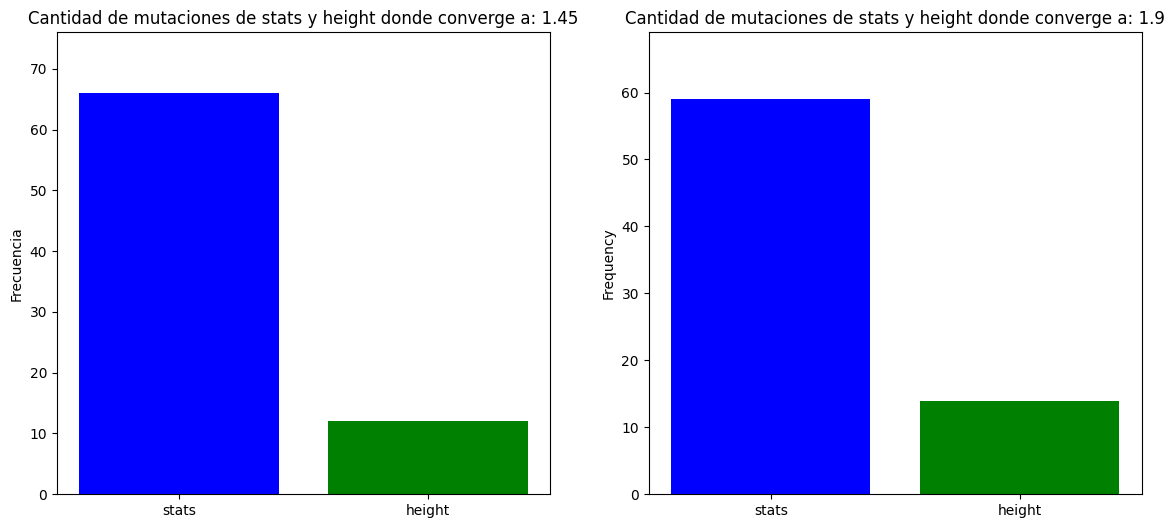

In [8]:
import matplotlib.pyplot as plt



# datos recopilados de manera experimental
data1 = [
    "stats", "stats", "height", "stats", "stats", "height", "stats", "stats", "stats", "stats",
    "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats",
    "stats", "stats", "stats", "stats", "stats", "height", "height", "stats", "stats", "stats",
    "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats",
    "stats", "stats", "stats", "height", "stats", "stats", "stats", "stats", "height", "stats",
    "stats", "stats", "height", "stats", "height", "stats", "stats", "stats", "height", "stats",
    "stats", "stats", "stats", "stats", "height", "stats", "stats", "height", "stats", "stats",
    "height", "stats", "stats", "stats", "stats", "stats", "stats", "stats"
]

data2 = [
    "stats", "stats", "stats", "stats", "stats", "stats", "stats", "height", "stats", "stats",
    "height", "stats", "stats", "stats", "height", "height", "stats", "stats", "stats", "stats",
    "stats", "stats", "height", "height", "stats", "stats", "stats", "stats", "stats", "stats",
    "height", "stats", "stats", "stats", "height", "stats", "stats", "stats", "stats", "stats",
    "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats", "stats", "height",
    "stats", "height", "stats", "stats", "stats", "stats", "height", "stats", "stats", "stats",
    "stats", "stats", "stats", "height", "height", "stats", "stats", "stats", "stats", "stats",
    "height", "stats", "stats"
]

# Counting occurrences of 'stats' and 'height' in each data set
counts1 = {'stats': data1.count('stats'), 'height': data1.count('height')}
counts2 = {'stats': data2.count('stats'), 'height': data2.count('height')}

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for data1
ax[0].bar(counts1.keys(), counts1.values(), color=['blue', 'green'])
ax[0].set_title('Cantidad de mutaciones de stats y height donde converge a: 1.45') #fitness 44.701926293449056
ax[0].set_ylabel('Frecuencia')
ax[0].set_ylim(0, max(counts1['stats'], counts1['height']) + 10)

# Bar plot for data2
ax[1].bar(counts2.keys(), counts2.values(), color=['blue', 'green'])
ax[1].set_title('Cantidad de mutaciones de stats y height donde converge a: 1.9') # fitness 59.87977415540866
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0, max(counts2['stats'], counts2['height']) + 10)

plt.show()


## Gif 3d local vs global

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation

# Create a meshgrid for two variables to create terrain plots
strengths, heights = np.meshgrid(np.linspace(0, 100, 50), np.linspace(1.3, 2, 50))

# Compute the outputs for each meshgrid adjusting parameters to maintain their sum at 150
s_h_outputs = np.array([[eve(s, 20, (150 - s - 20 - 20 - 20), 20, 20, h) for s, h in zip(strength_row, height_row)]
                        for strength_row, height_row in zip(strengths, heights)])
fig = plt.figure(figsize=(10,8))

csv_file_path = '../output/map.csv'
csv_file_path2 = '../output/map2.csv'
data = pd.read_csv(csv_file_path)
data2 = pd.read_csv(csv_file_path2)
grouped_data2 = data2.groupby('generation')
grouped_data = data.groupby('generation')

# Strength vs Height
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(strengths, heights, s_h_outputs, cmap='viridis')
ax.set_title('Strength vs Height')
ax.set_xlabel('Strength')
ax.set_ylabel('Height')
ax.set_zlabel('Output')


def update_graph(num):
    ax.clear()
    ax.set_title('Population Evolution Over Generations')
    ax.plot_surface(strengths, heights, s_h_outputs, cmap='viridis', alpha=0.5)
    ax.set_title('Strength vs Height')
    ax.set_xlabel('Strength')
    ax.set_ylabel('Height')
    ax.set_zlabel('Fitness')
    gen_data = grouped_data.get_group(num)
    gen_data2 = grouped_data2.get_group(num)
    scatter = ax.scatter(gen_data['strength'], gen_data['height'], gen_data['fitness'], c='green', s=50, label=f'Generation {num}')
    scatter2 = ax.scatter(gen_data2['strength'], gen_data2['height'], gen_data2['fitness'], c='orange', s=50, label=f'Generation {num}')
    ax.legend()

# Create animation
ani = FuncAnimation(fig, update_graph, frames=len(grouped_data), repeat=True)

# Save as GIF
ani.save('../output/video/population_evolution_comp.gif', writer='imagemagick', fps=30)

plt.close(fig)



## GIF Video comparación

Muestra a lo largo de las generaciones como va estancandose o encontrando los máximos en un GIF

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def update_animation_with_min_max_errors(csv_file_path1, csv_file_path2, population_size=20):
    # Load data from both CSV files
    df1 = pd.read_csv(csv_file_path1)
    df2 = pd.read_csv(csv_file_path2)

    # Assuming each 10 rows is a new generation
    df1['generation'] = df1.index // population_size  
    df2['generation'] = df2.index // population_size  
    
    # Normalize the height by scaling it for visualization purposes
    df1['height'] = df1['height'] * 100
    df2['height'] = df2['height'] * 100

    # Genotype related columns
    genotype_columns = ['strength', 'dexterity', 'intelligence', 'vigor', 'constitution', 'height']
    
    # Pre-calculate the minimum, maximum, and mean of fitness per generation for both datasets
    fitness_stats1 = df1.groupby('generation')['fitness'].agg(['mean', 'min', 'max'])
    fitness_stats2 = df2.groupby('generation')['fitness'].agg(['mean', 'min', 'max'])
    
    # Create a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [3, 3, 2]})
    plt.subplots_adjust(wspace=0.5)
    
    # Create a secondary y-axis for the height scale on both genotype plots
    ax_height1 = ax1.twinx()
    ax_height2 = ax2.twinx()
    
    def animate(generation):
        # Clear previous plots
        ax1.clear()
        ax2.clear()
        ax3.clear()
        ax_height1.clear()
        ax_height2.clear()
        ax1.set_ylim(0, 200)
        ax2.set_ylim(0, 200)
        # Filter data for the current generation for both datasets
        gen_data1 = df1[df1['generation'] == generation][genotype_columns]
        gen_data2 = df2[df2['generation'] == generation][genotype_columns]
        
        # Calculate mean, min, and max for error bars
        means1 = gen_data1.mean()
        min1 = gen_data1.min()
        max1 = gen_data1.max()
        errors1 = [means1 - min1, max1 - means1]
        
        means2 = gen_data2.mean()
        min2 = gen_data2.min()
        max2 = gen_data2.max()
        errors2 = [means2 - min2, max2 - means2]
        
        # Bar plot for dataset 1
        ax1.bar(means1.index, means1, yerr=errors1, capsize=4, color=['mediumaquamarine']*5 + ['skyblue'], error_kw={'ecolor': 'black', 'capthick': 2})
        ax1.set_title(f"Mutaciones de stats y height - max local: 1.45 - Generation {generation}")
        ax1.set_ylabel("Puntos")
        ax_height1.set_ylim(0, 200)
        ax_height1.set_ylabel('Altura (cm)')
        ax_height1.yaxis.set_label_position("right")
        
        
        # Bar plot for dataset 2
        ax2.bar(means2.index, means2, yerr=errors2, capsize=4, color=['salmon']*5 + ['orange'], error_kw={'ecolor': 'black', 'capthick': 2})
        ax2.set_title(f"Mutaciones de stats y height - max global: 1.92 - Generation {generation}")
        ax2.set_ylabel("Puntos")
        ax_height2.set_ylim(0, 200)
        ax_height2.set_ylabel('Altura (cm)')
        ax_height2.yaxis.set_label_position("right")
        
        # Adding combined fitness plot
        x_values1 = fitness_stats1.index[:generation + 1]
        mean_values1 = fitness_stats1['mean'][:generation + 1]
        min_values1 = fitness_stats1['min'][:generation + 1]
        max_values1 = fitness_stats1['max'][:generation + 1]
        
        x_values2 = fitness_stats2.index[:generation + 1]
        mean_values2 = fitness_stats2['mean'][:generation + 1]
        min_values2 = fitness_stats2['min'][:generation + 1]
        max_values2 = fitness_stats2['max'][:generation + 1]
        
        # Plot fitness for both datasets
        ax3.plot(x_values1, mean_values1, color='forestgreen', linestyle='-', linewidth=2)
        ax3.fill_between(x_values1, min_values1, max_values1, color='forestgreen', alpha=0.3)
        
        ax3.plot(x_values2, mean_values2, color='darkorange', linestyle='-', linewidth=2)
        ax3.fill_between(x_values2, min_values2, max_values2, color='darkorange', alpha=0.3)
        
        ax3.set_title("Fitness por generación")
        ax3.set_xlabel("Generación")
        ax3.set_ylabel("Fitness")
        ax3.grid(True)
        ax3.set_ylim(0, 100)
    
    num_generations = max(df1['generation'].max(), df2['generation'].max()) + 1
    ani = FuncAnimation(fig, animate, frames=num_generations, interval=100)

    ani.save('../output/local_vs_global_height2.gif', writer='imagemagick', fps=30)
    plt.close(fig)

# This updated function will calculate error bars based on actual min and max values rather than std deviations.


# cuando los haces tenes que poner el population size a mano sino vas a hacer cagadas,
# despues podemos configurarlo para que reciba el config y lo deduzca del population size directamente
json_config = '../config/algorithm_config.json'
# json object
import json
with open(json_config, 'r') as file:
    config = json.load(file)
    
size = config["population_size"]

update_animation_with_min_max_errors('../output/local_height.csv', '../output/global_height.csv', 20)

0        0
1        0
2        0
3        0
4        0
        ..
1995    99
1996    99
1997    99
1998    99
1999    99
Name: generation, Length: 2000, dtype: int64


# Beta para crecimiento

como con un 
current_value = 40,
total_points = 150,

se comportaría segun alphas y betas distintos.

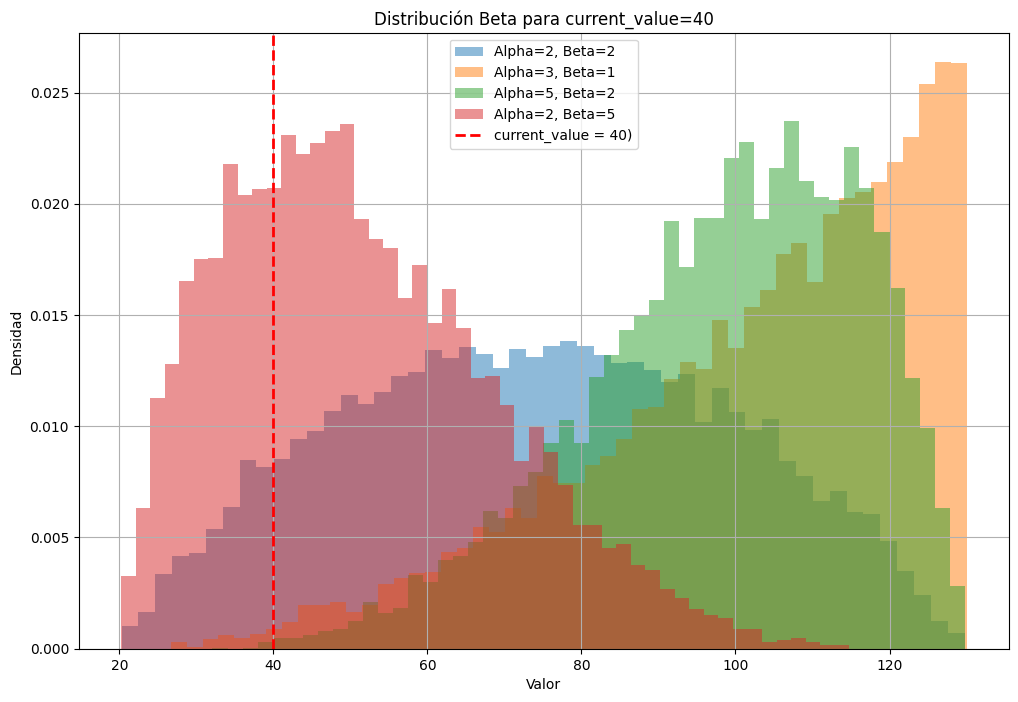

In [99]:
import random
current_value = 40  # Current value of the distribution
# Different sets of alpha and beta to visualize their impact on the distribution
alpha_beta_pairs = [(2, 2), (3, 1), (5, 2), (2, 5)]  # Different combinations of alpha and beta
num_samples = 10000
total_points = 150
# Plot multiple histograms for each (alpha, beta) combination
plt.figure(figsize=(12, 8))

for alpha, beta in alpha_beta_pairs:
    beta_values = [random.betavariate(alpha, beta) * (total_points - current_value) + current_value*0.5 for _ in range(num_samples)]
    plt.hist(beta_values, bins=50, density=True, alpha=0.5, label=f'Alpha={alpha}, Beta={beta}')

plt.axvline(current_value, color='red', linestyle='dashed', linewidth=2, label='current_value = 40)')
plt.title('Distribución Beta para current_value=40')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

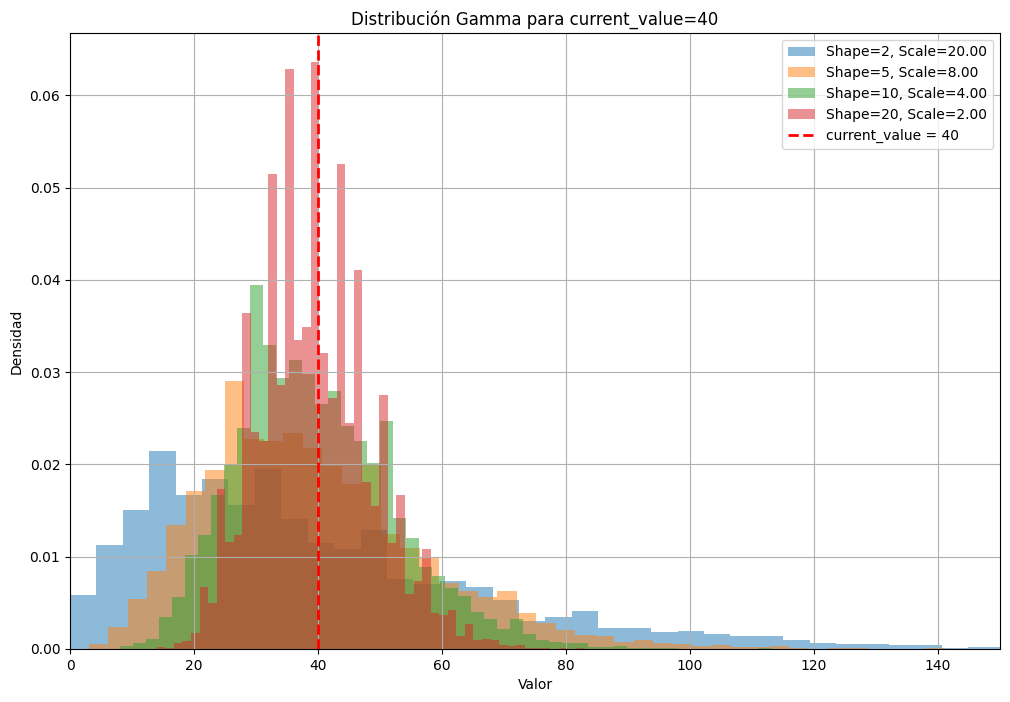

In [101]:
# Different sets of shape values to visualize their impact on the gamma distribution
shape_values = [2, 5, 10, 20]  # Different shape values for comparison
current_value = 40
total_points = 150
num_samples = 10000

colors = ['blue', 'green', 'orange', 'purple']


# Plot multiple histograms for each shape value
plt.figure(figsize=(12, 8))

for i, shape in enumerate(shape_values):
    scale = current_value / shape if current_value > 0 else 1  # Adjust scale based on current value and shape
    gamma_values = [int(random.gammavariate(shape, scale)) for _ in range(num_samples)]
    plt.hist(gamma_values, bins=50, density=True, alpha=0.5,  label=f'Shape={shape}, Scale={scale:.2f}')

plt.axvline(current_value, color='red', linestyle='dashed', linewidth=2, label='current_value = 40')
plt.title('Distribución Gamma para current_value=40')
plt.xlabel('Valor')
ax = plt.gca()
ax.set_xlim(0, 150)
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()
